# Student Performance Indicator

## Life Cycle of a Machine Learning Project

1. **Understanding the Problem Statement**
2. **Data Collection**
3. **Data Checks to Perform**
4. **Exploratory Data Analysis**
5. **Data Pre-Processing**
6. **Model Training**
7. **Choose Best Model**

---

### 1. Problem Statement

This project aims to understand how student performance (test scores) is affected by other variables such as gender, ethnicity, parental level of education, lunch, and test preparation course.

---

### 2. Data Collection

- **Dataset Source:** [Kaggle - Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
- **Dataset Details:** 8 columns, 1000 rows

#### 2.1 Import Data and Required Packages

Importing the following libraries:
- Pandas
- Numpy
- Matplotlib
- Seaborn
- Warnings

---

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset as a Pandas DataFrame

In [30]:
df = pd.read_csv("/Users/harshsinha/VS Code/ML Project/notebooks/data/StudentsPerformance.csv")
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
df.shape

(1000, 8)

## 2.2 Dataset Information

- **gender**: Sex of students (male/female)
- **race/ethnicity**: Ethnicity of students (Group A, B, C, D, E)
- **parental level of education**: Parents' final education (bachelor's degree, some college, master's degree, associate's degree, high school)
- **lunch**: Lunch before test (standard or free/reduced)
- **test preparation course**: Test preparation course completed or not (completed/none)
- **math score**: Math exam score
- **reading score**: Reading exam score
- **writing score**: Writing exam score

---

## 3. Data Checks to Perform

- Check for missing values
- Check for duplicates
- Check data types
- Check the number of unique values in each column
- Check dataset statistics
- Check various categories present in the different categorical columns

### 3.1 Check Missing values & duplicates




In [32]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [33]:
df.duplicated().sum()

np.int64(0)

#### 3.3 Check data types


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values of each column


In [35]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 Check statistics of data set


In [36]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight

- From the above description of numerical data:
    - All means are very close to each other, between **66** and **68.05**.
    - All standard deviations are also close, between **14.6** and **15.19**.
    - The minimum score for **math** is **0**, while for **writing** it is much higher at **10**, and for **reading** it is even higher at **17**.

#### 3.7 Exploring Data

In [37]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [38]:
print("Categories in 'gender' variable: ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [39]:
print("Data type of 'parental level of education': ", df["parental level of education"].dtype)
print("Data type of 'math score': ", df["math score"].dtype)

Data type of 'parental level of education':  object
Data type of 'math score':  int64


In [40]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### 3.8 Adding columns for "Total Score" and "Average"

In [41]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [43]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [44]:

reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights

- From the above values, students have performed the worst in **Maths**.
- Best performance is in the **Reading** section.
- All standard deviations are also close, between **14.6** and **15.19**.
- The minimum score for **math** is **0**, while for **writing** it is much higher at **10**, and for **reading** it is even higher at **17**.

## 4. Exploring Data (Visualization)

### 4.1 Visualize Average Score Distribution

To understand how students' average scores are distributed, we can use a histogram and a Kernel Density Estimate (KDE) plot.

- **Histogram:** Shows the frequency of students within score ranges.
- **KDE Plot:** Provides a smoothed curve representing the distribution.

#### 4.1.1 Histogram & KDE

We will visualize the `average` column from the dataset to draw insights about overall student performance.

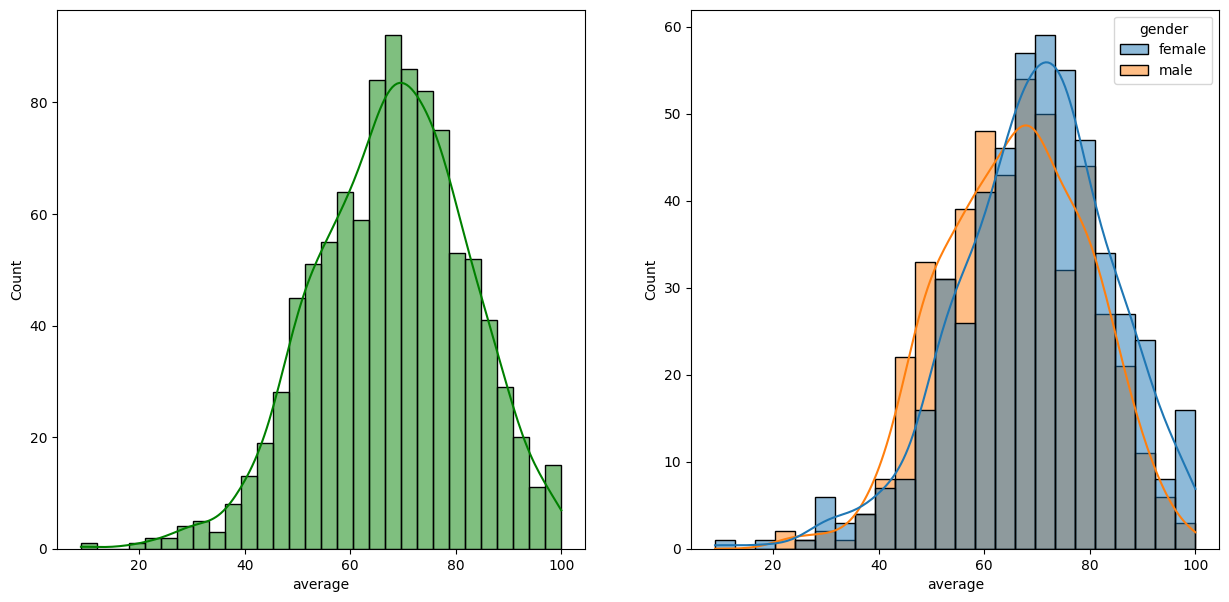

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

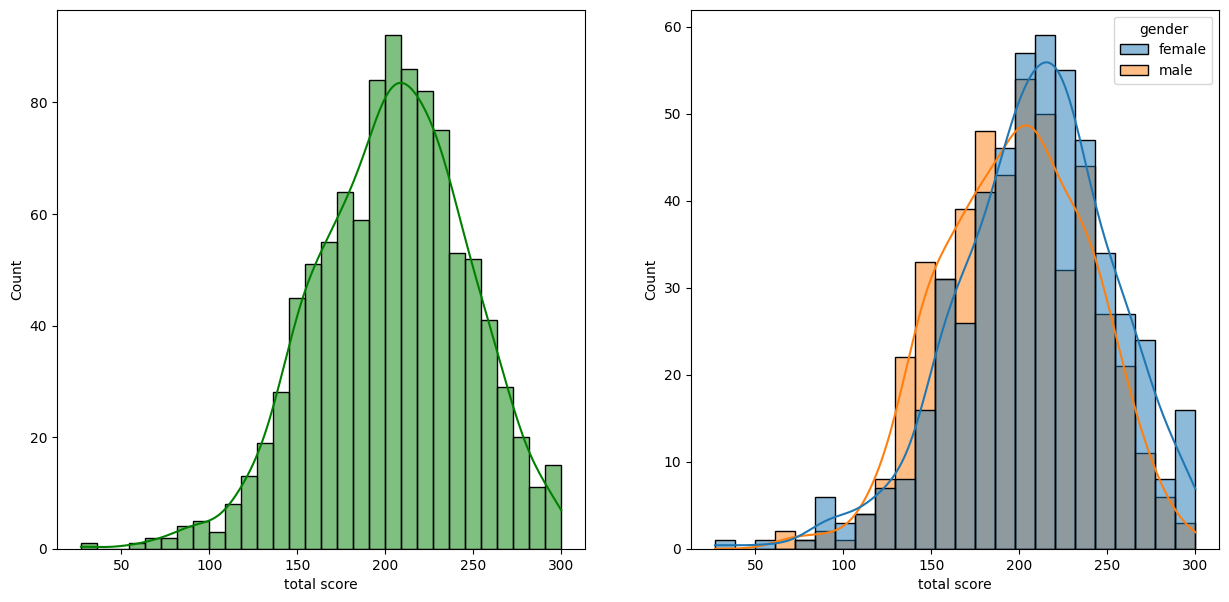

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()


### Insights
- Female students tend to perform well compared to male students.

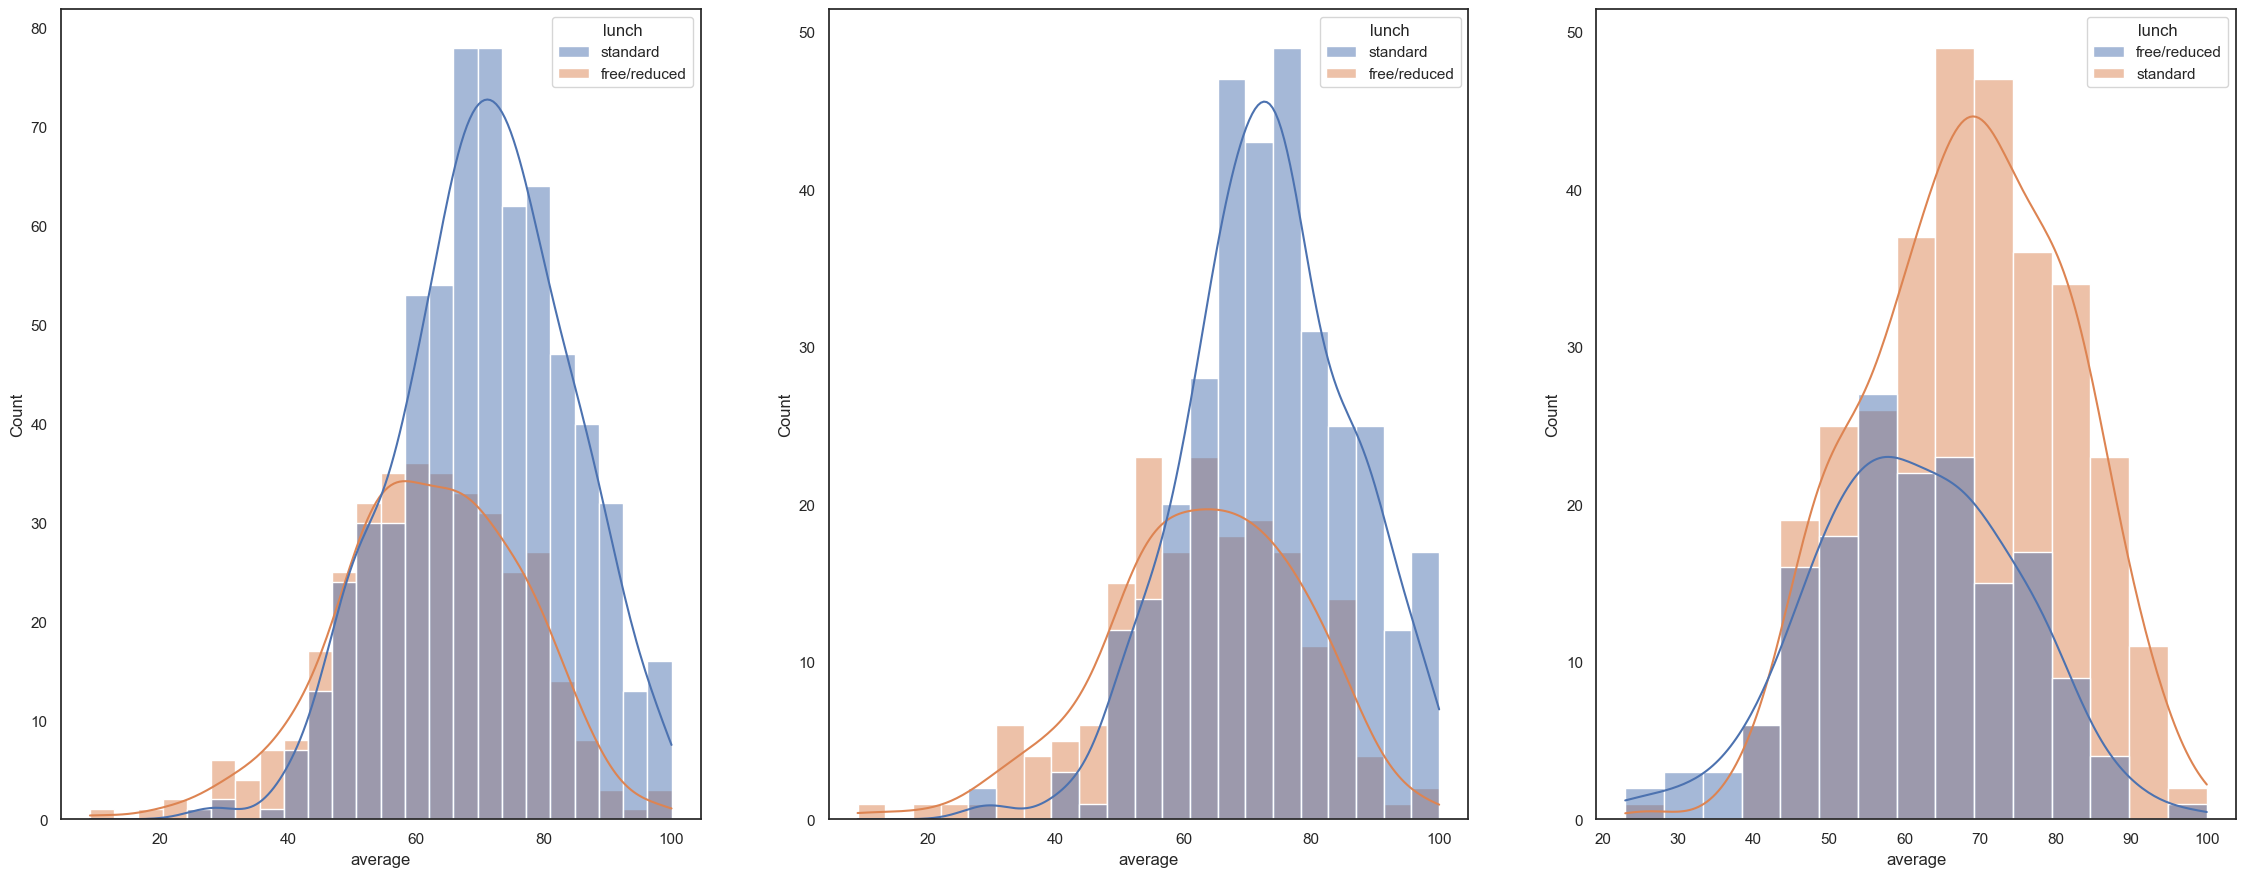

In [ ]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()


### Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

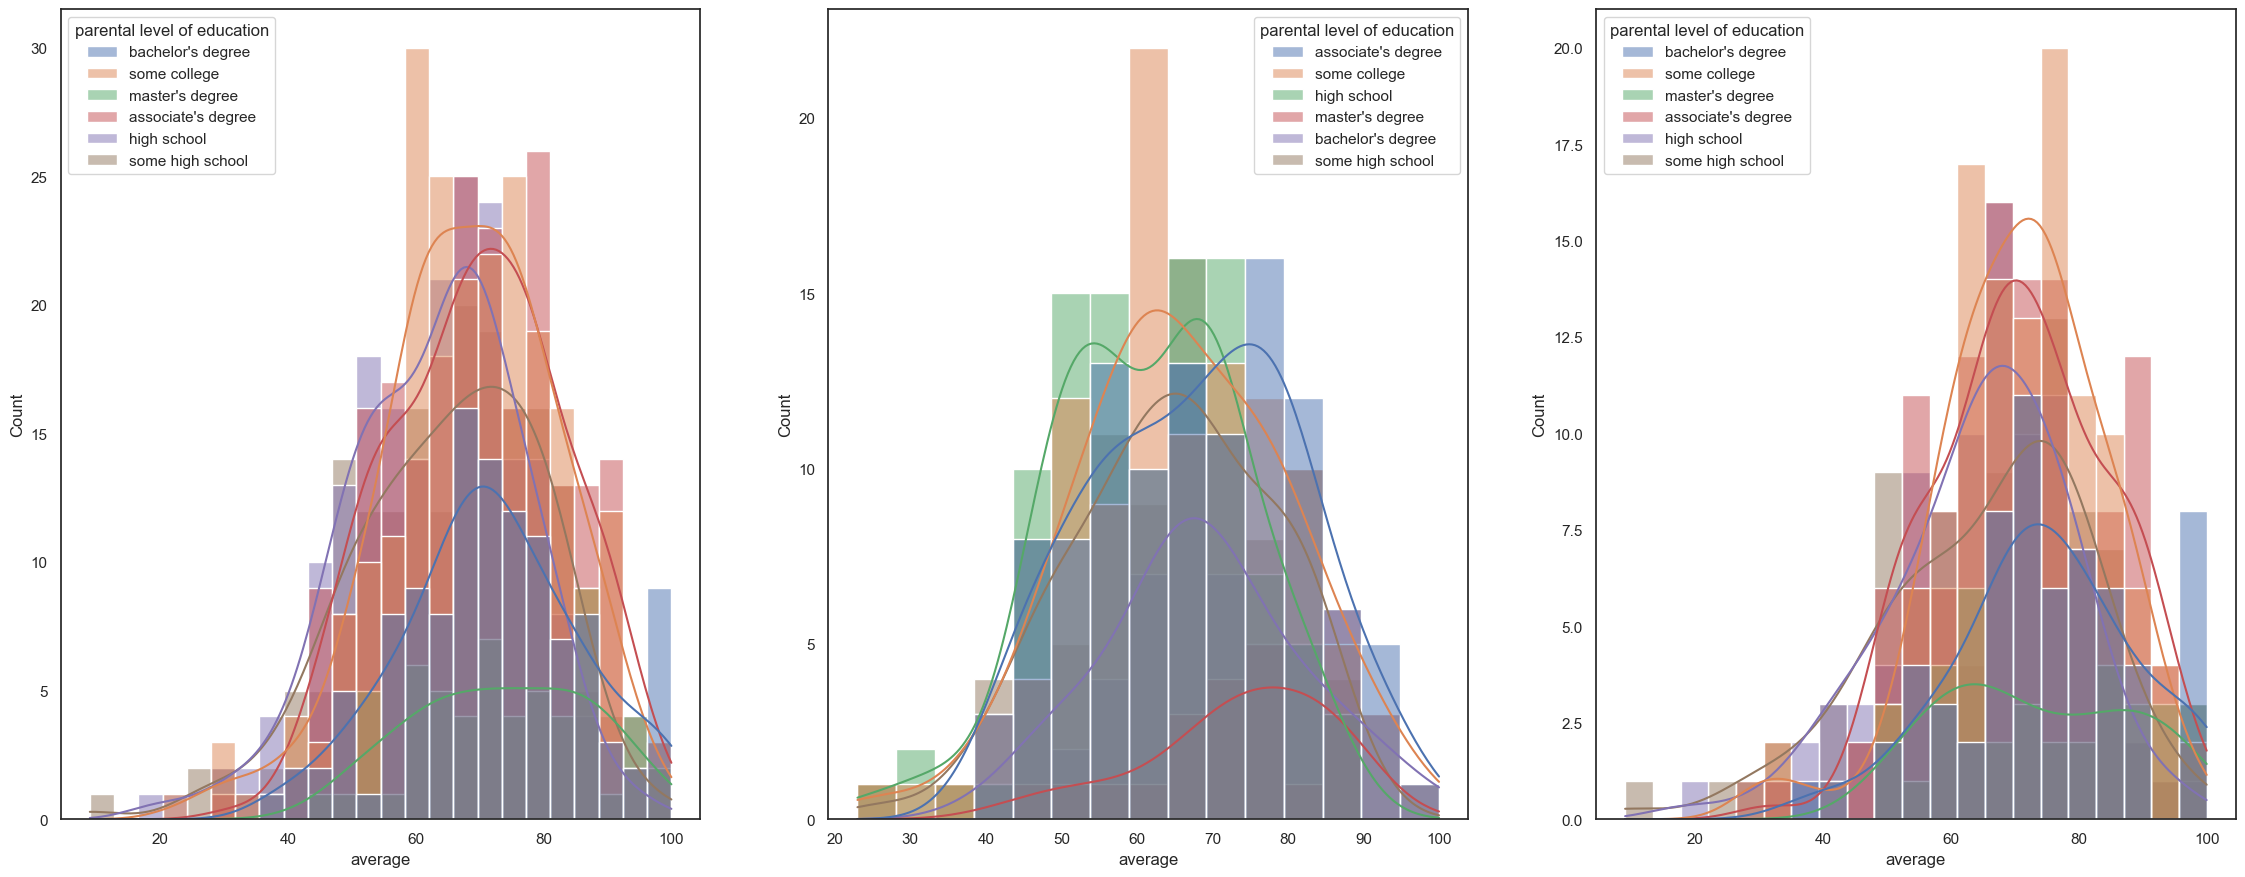

In [79]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()


### Insights

- In general, parental education does not significantly impact student exam performance.
- The second plot shows that male students whose parents have an associate's or master's degree tend to perform better in exams.
- The third plot indicates that parental education level has little to no effect on the performance of female students.

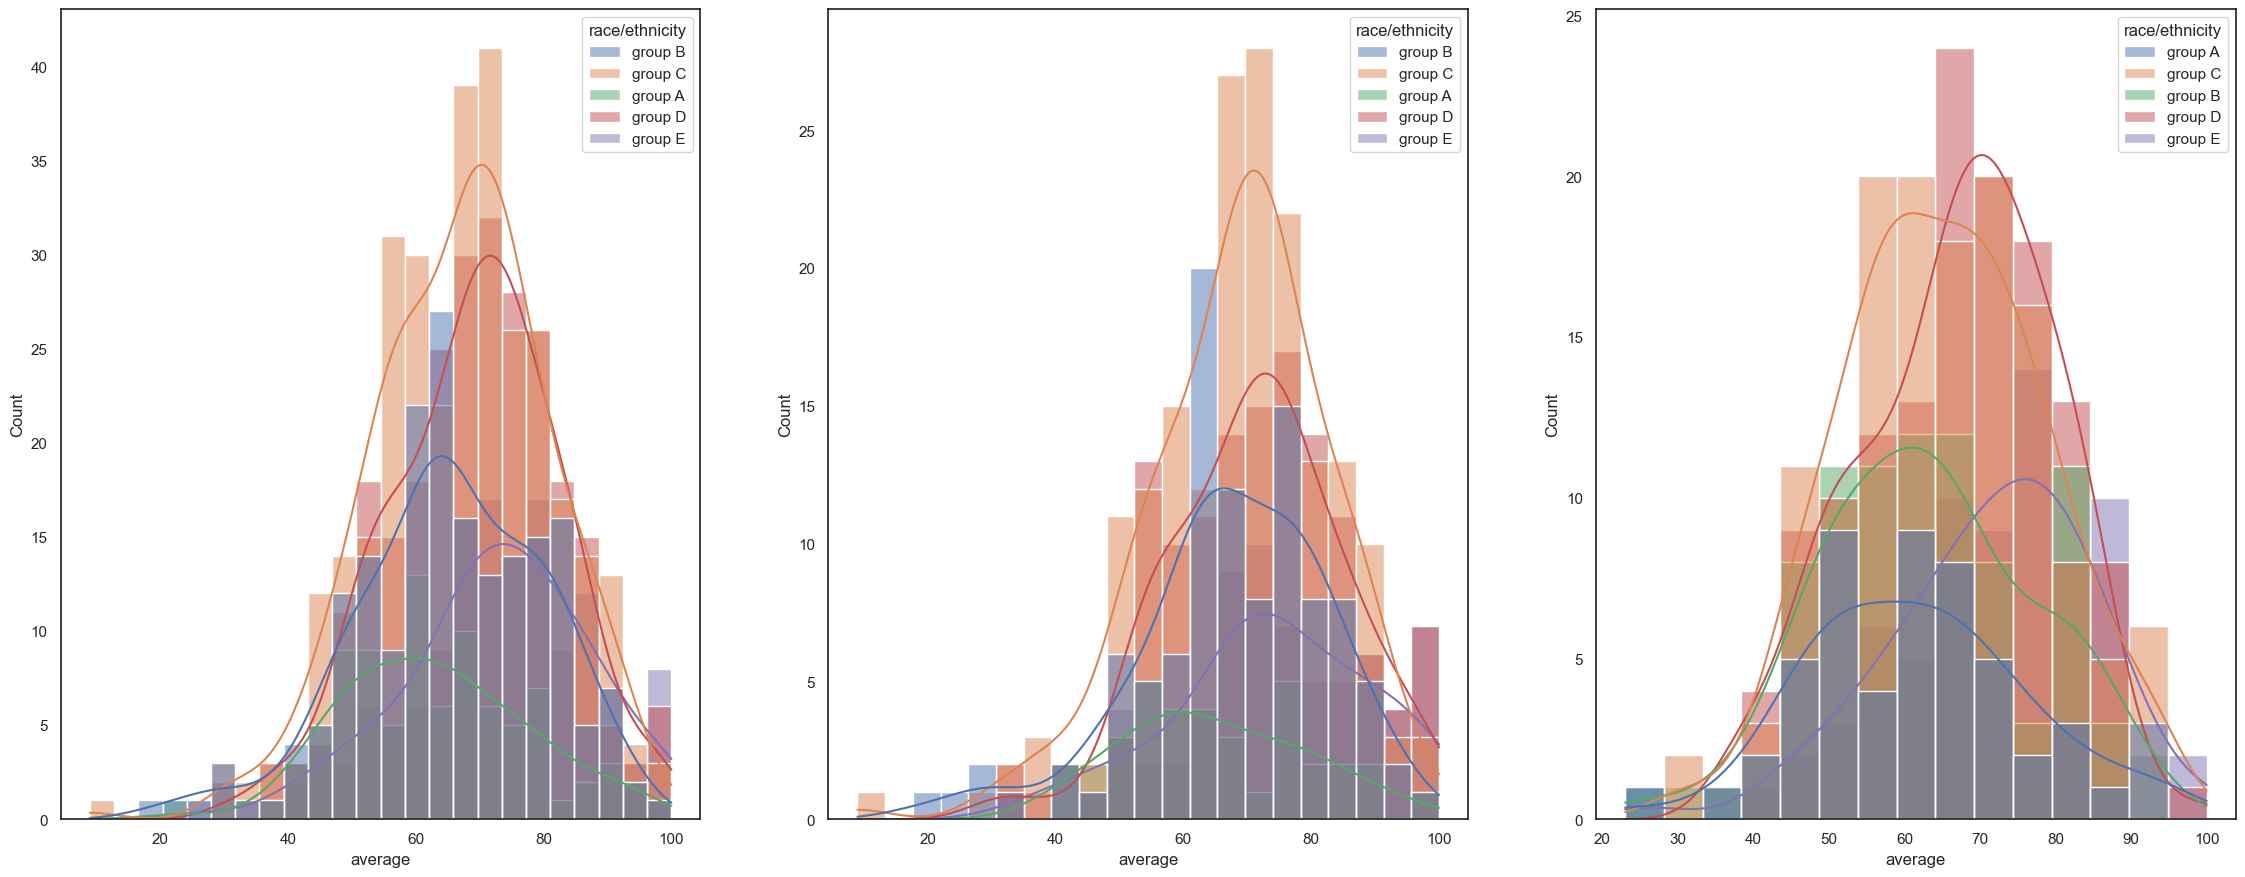

In [80]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()


### Insights
- Students of group A and group B tend to perform poorly in exams.
- Students of group A and group B tend to perform poorly in exams irrespective of whether they are male or female.


## 4.2 Maximum score of students in all three subjects


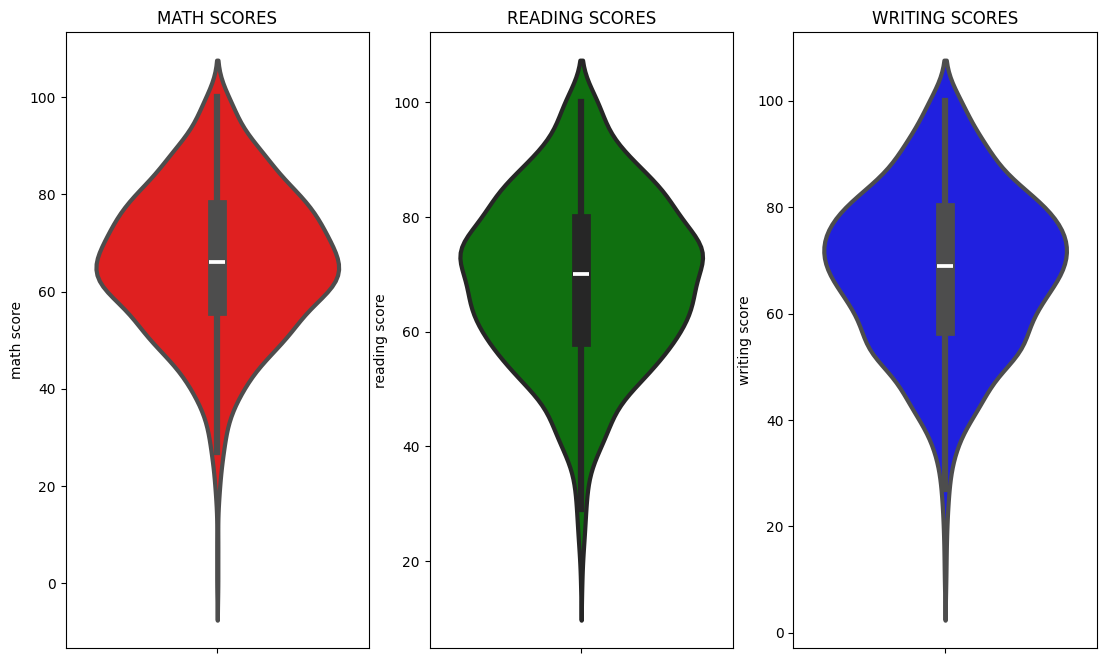

In [50]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()


### Insights
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3 Multivariate analysis using pieplot


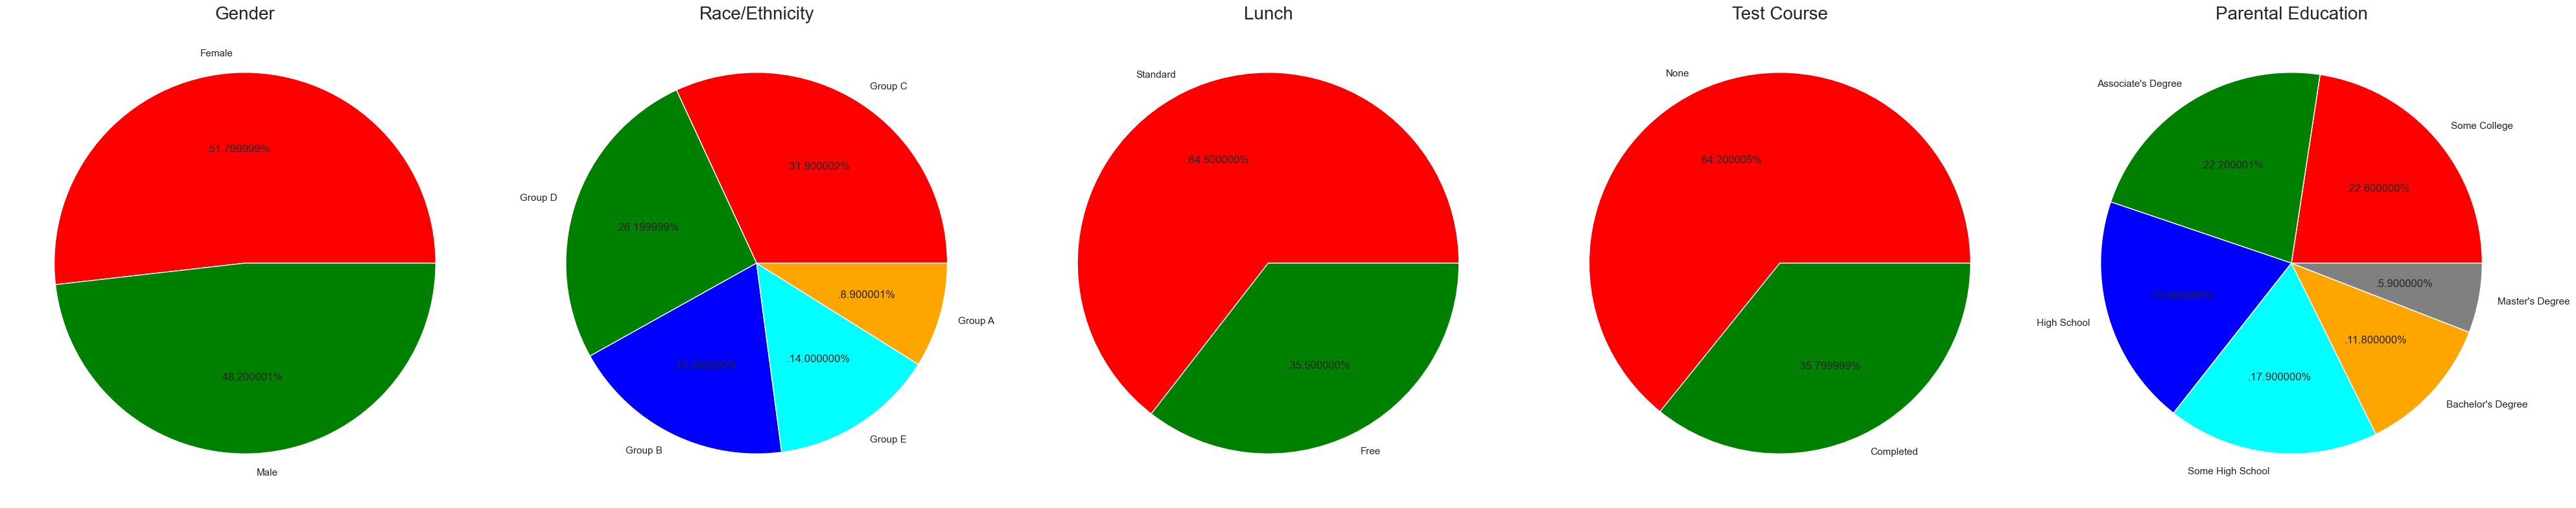

In [81]:
plt.rcParams['figure.figsize'] = (40, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


### Insights
- Number of Male and Female students is almost equal
- Number of students in Group C is the greatest
- Number of students who have standard lunch is greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization

#### 4.4.1 Gender Column

- **How is the distribution of Gender?**
- **Does gender have any impact on student performance?**

## **Univariate Analysis:**  
### How is the distribution of Gender?

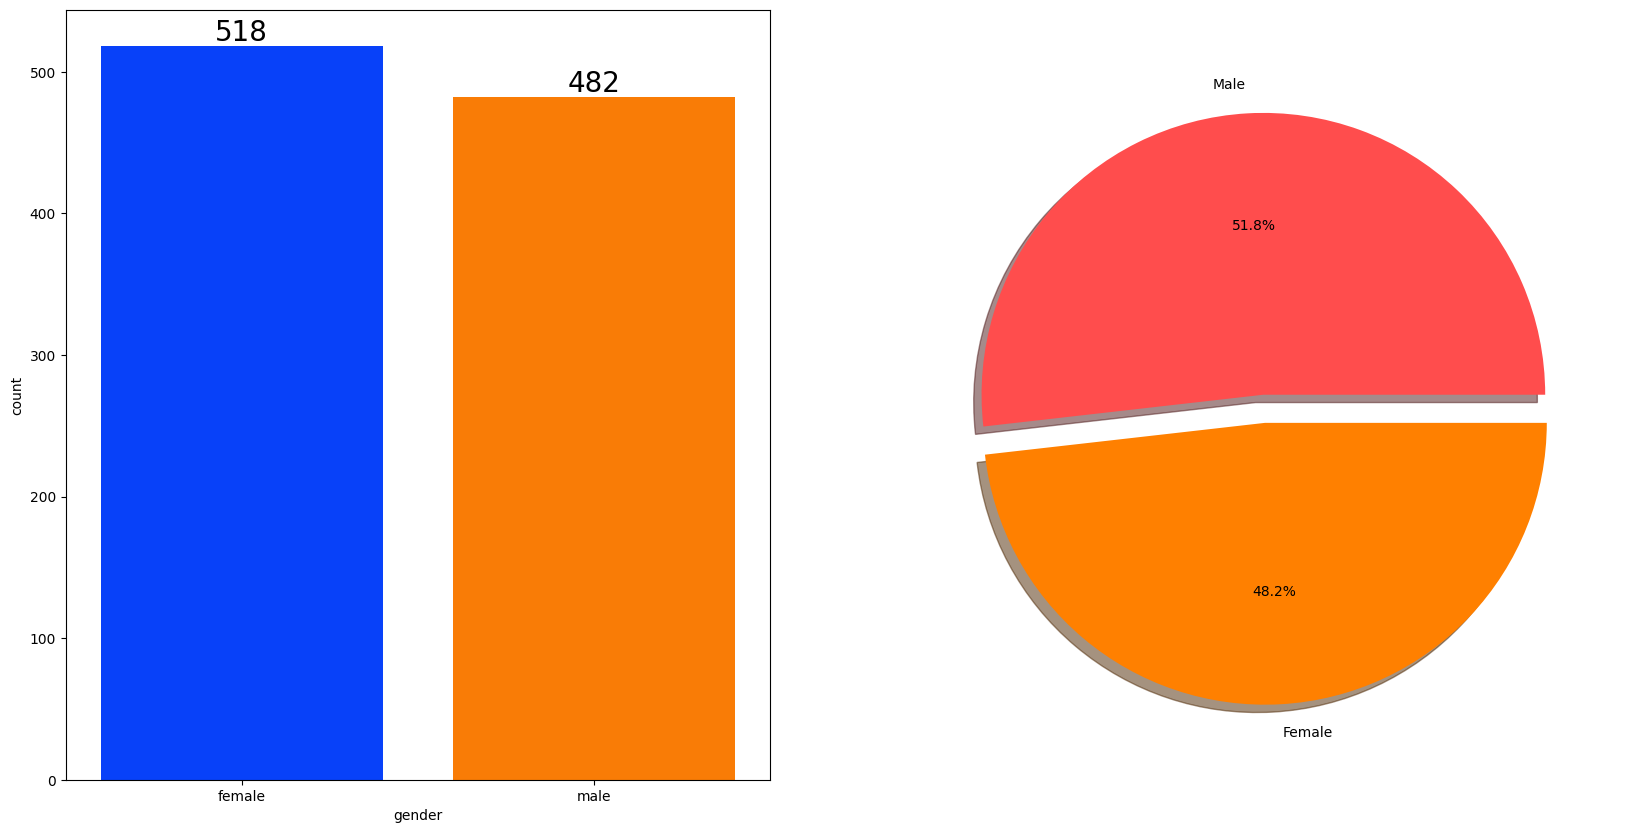

In [52]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


## Insights
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [54]:
gender_group = df.groupby('gender')[numeric_features].mean()
gender_group

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


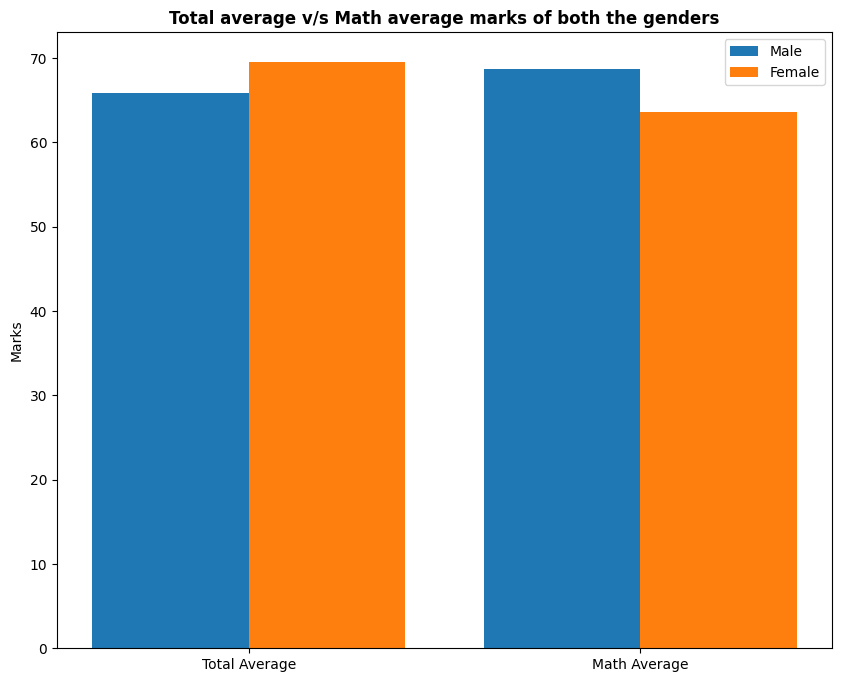

In [ ]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

gender_group['average'] = gender_group[['math score', 'reading score', 'writing score']].mean(axis=1)

female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math score']]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

## Insights

- On average, females have a better overall score than males.
- Males have scored higher in Maths compared to females.

---

### 4.4.2 Race/Ethnicity Column

#### How is Group-wise Distribution?
- What is the distribution of students across different race/ethnicity groups?

#### Does Race/Ethnicity Have Any Impact on Student Performance?

---

#### **Univariate Analysis:**  
**How is Group-wise Distribution?**

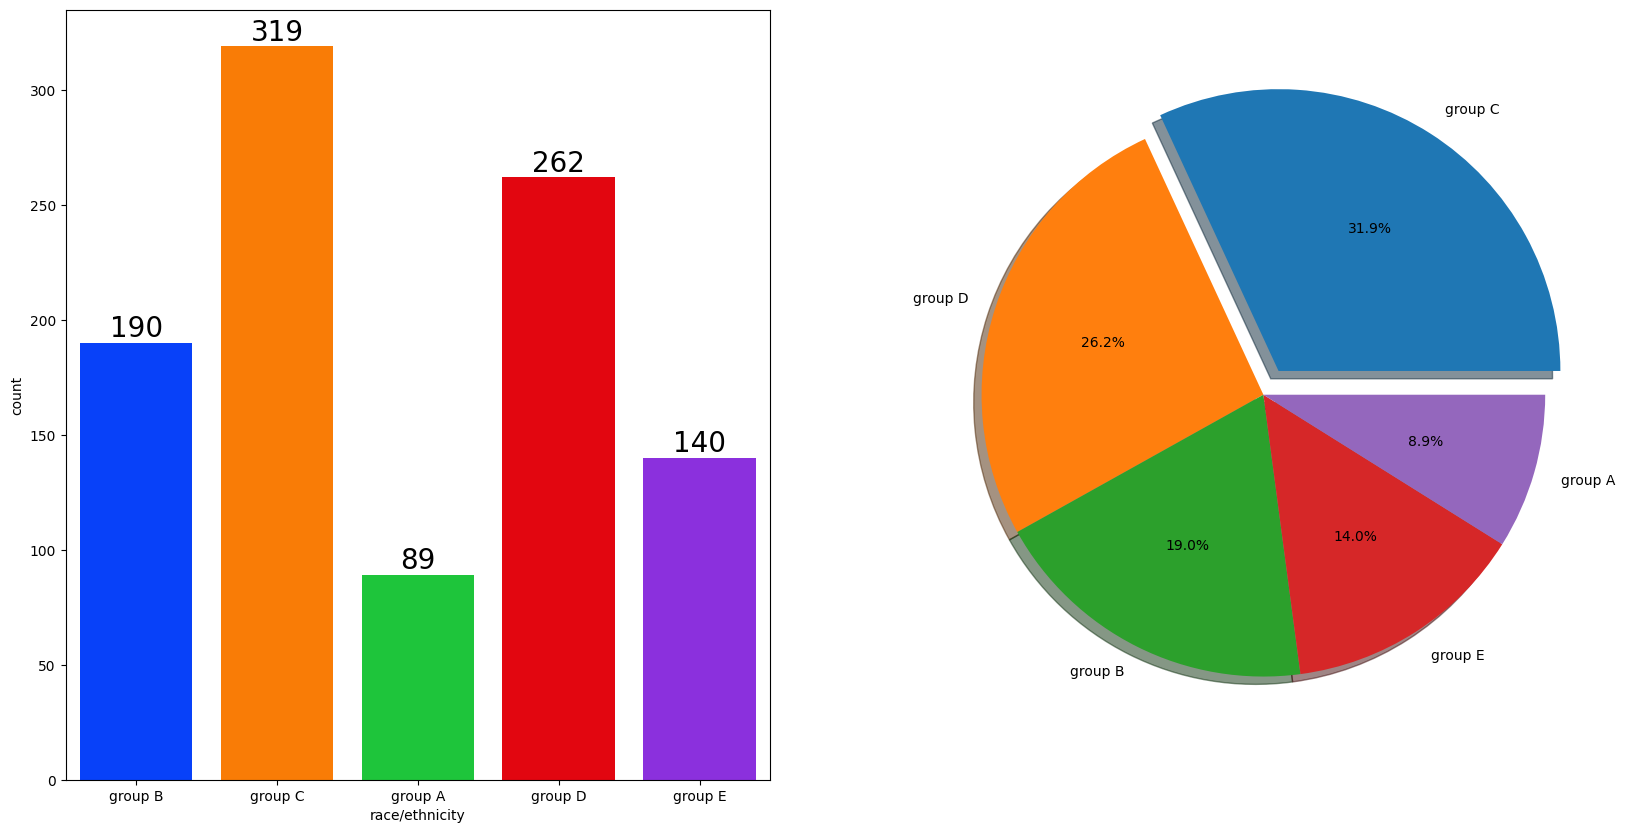

In [59]:

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

## Insights
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.
#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

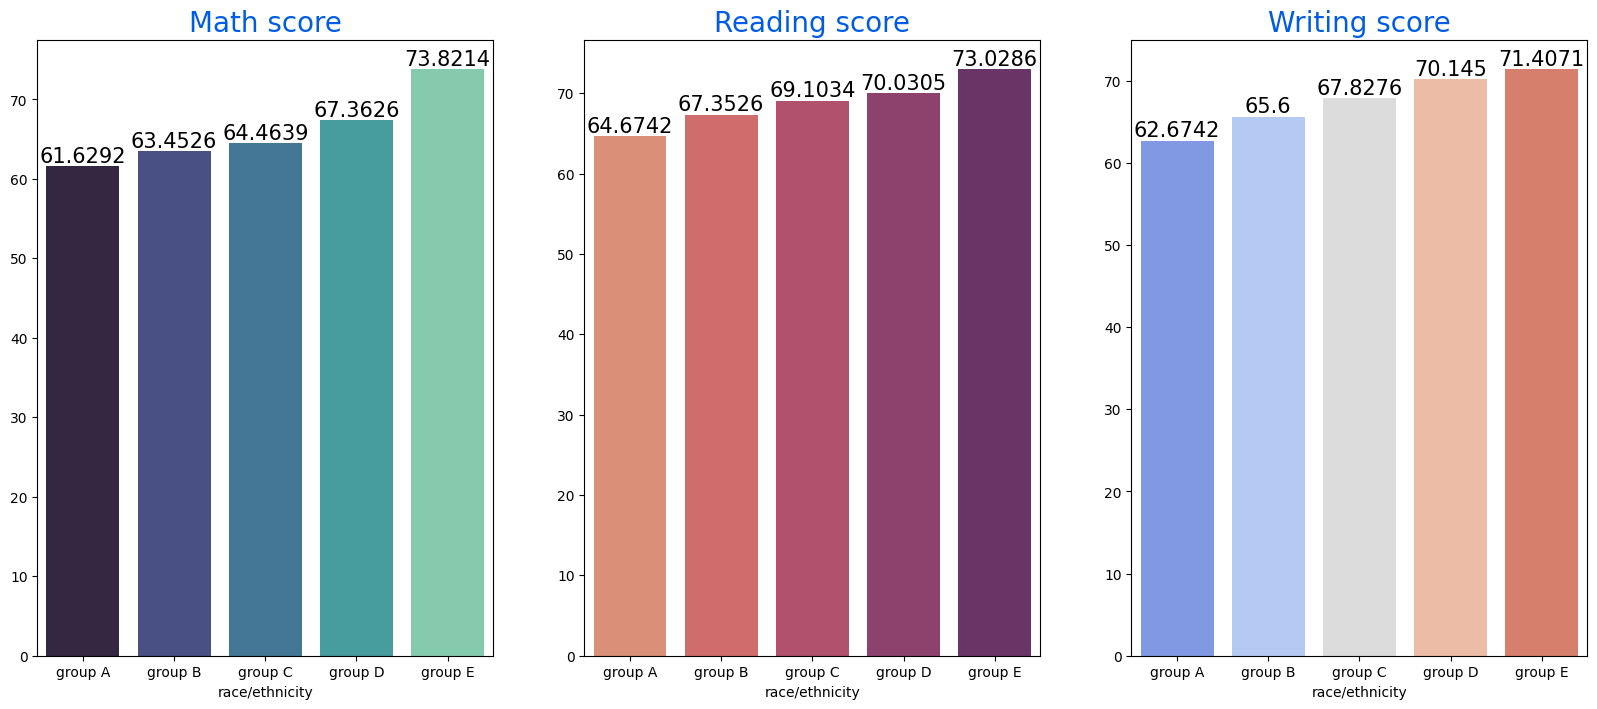

In [60]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights

- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower socioeconomic status have a lower average in all course subjects.

---

### 4.4.3 Parental Level of Education Column

#### What is the educational background of students' parents?
#### Does parental education have any impact on student performance?

---

#### **Univariate Analysis:**  
**What is the educational background of students' parents?**

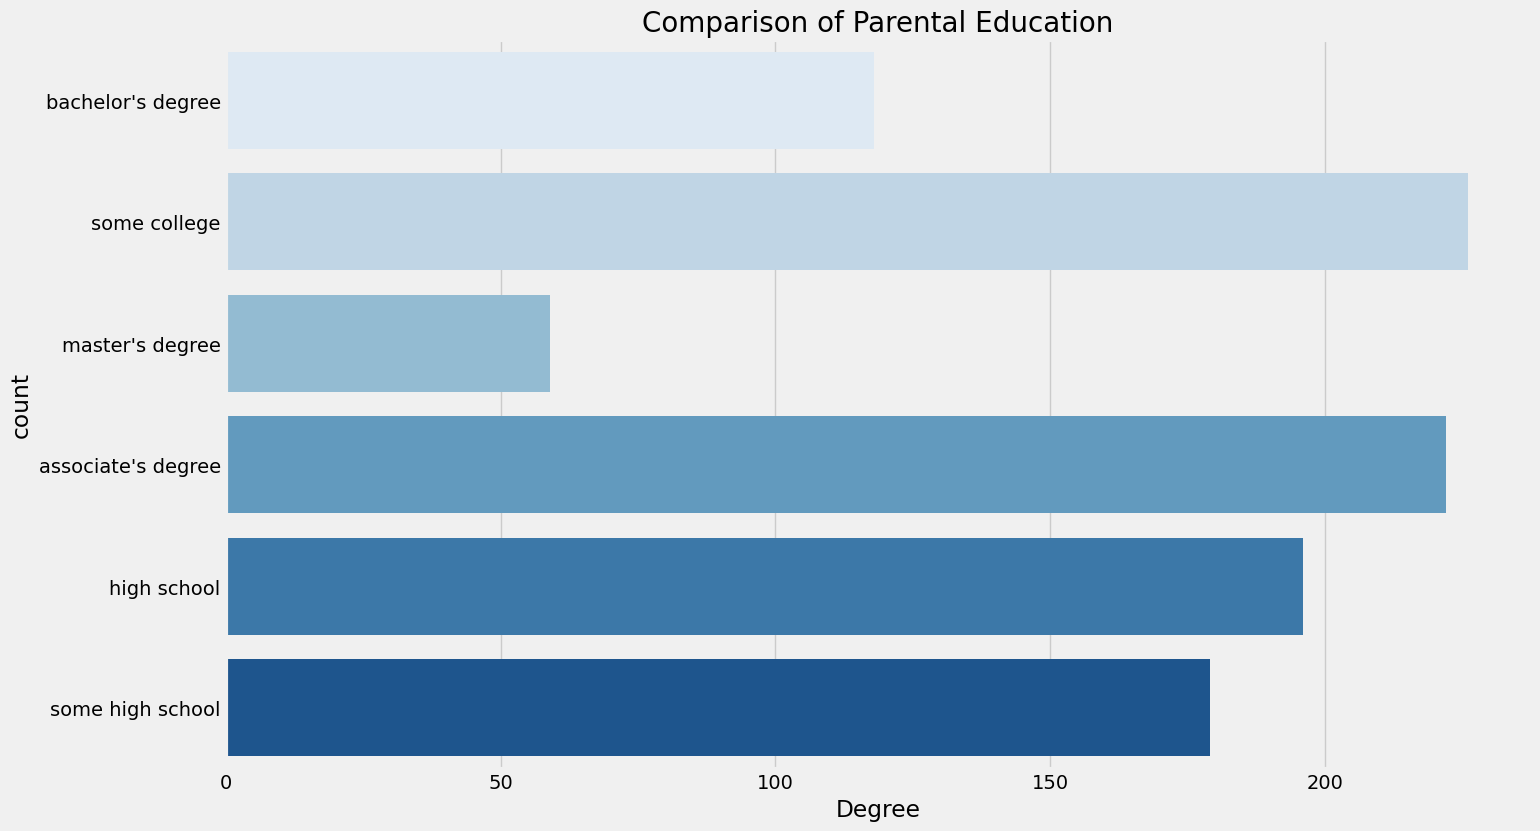

In [61]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Insights
- Largest number of parents are from some college.
- Group A students have scored the lowest marks.
- Students from a lower socioeconomic status have a lower average in all course subjects.
#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

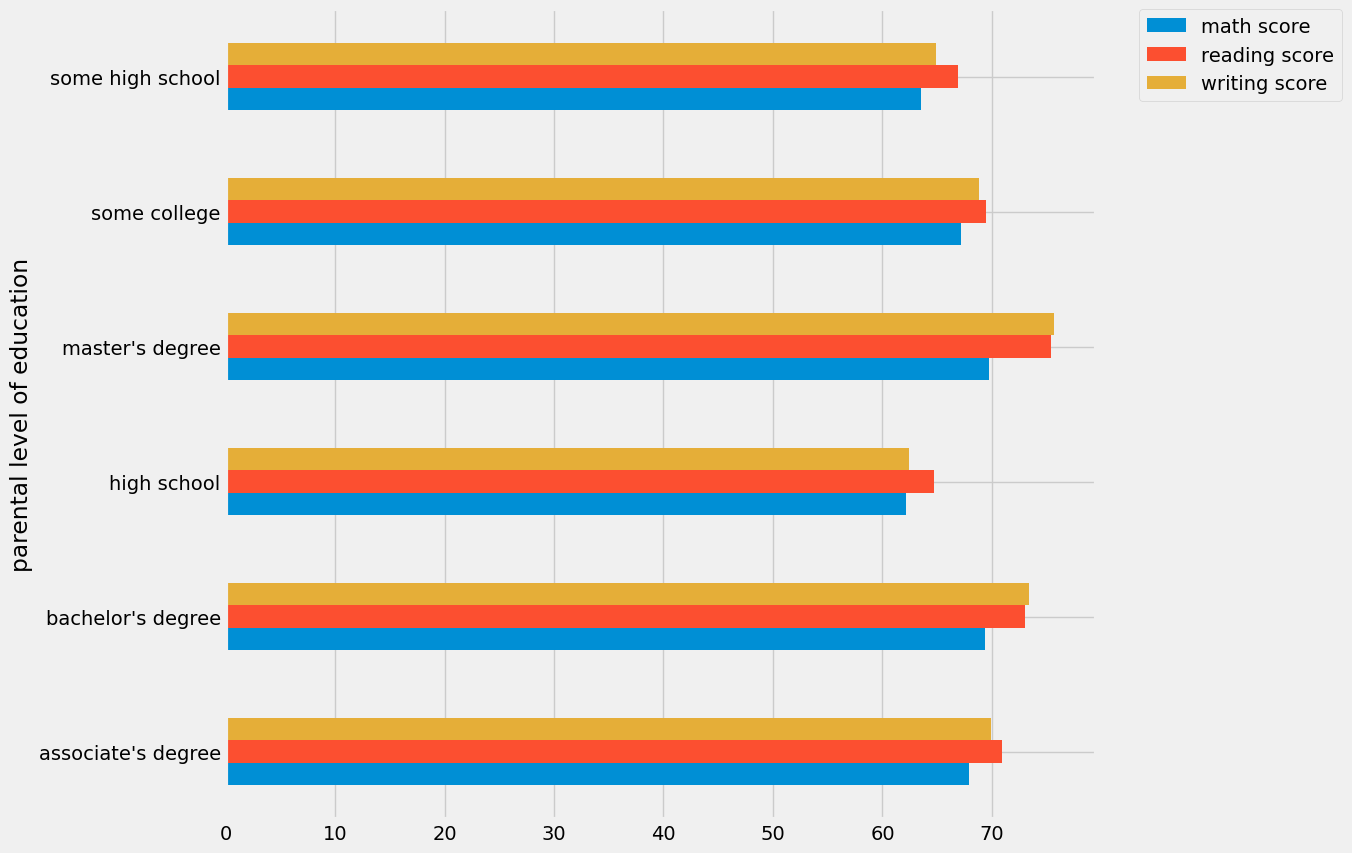

In [63]:
df.groupby('parental level of education')[numeric_features].mean().plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Insights

- The scores of students whose parents possess master's and bachelor's level education are higher than others.

---

### 4.4.4 Lunch Column

#### Which type of lunch is most common among students?
#### What is the effect of lunch type on test results?

---

#### **Univariate Analysis:**  
**Which type of lunch is most common among students?**

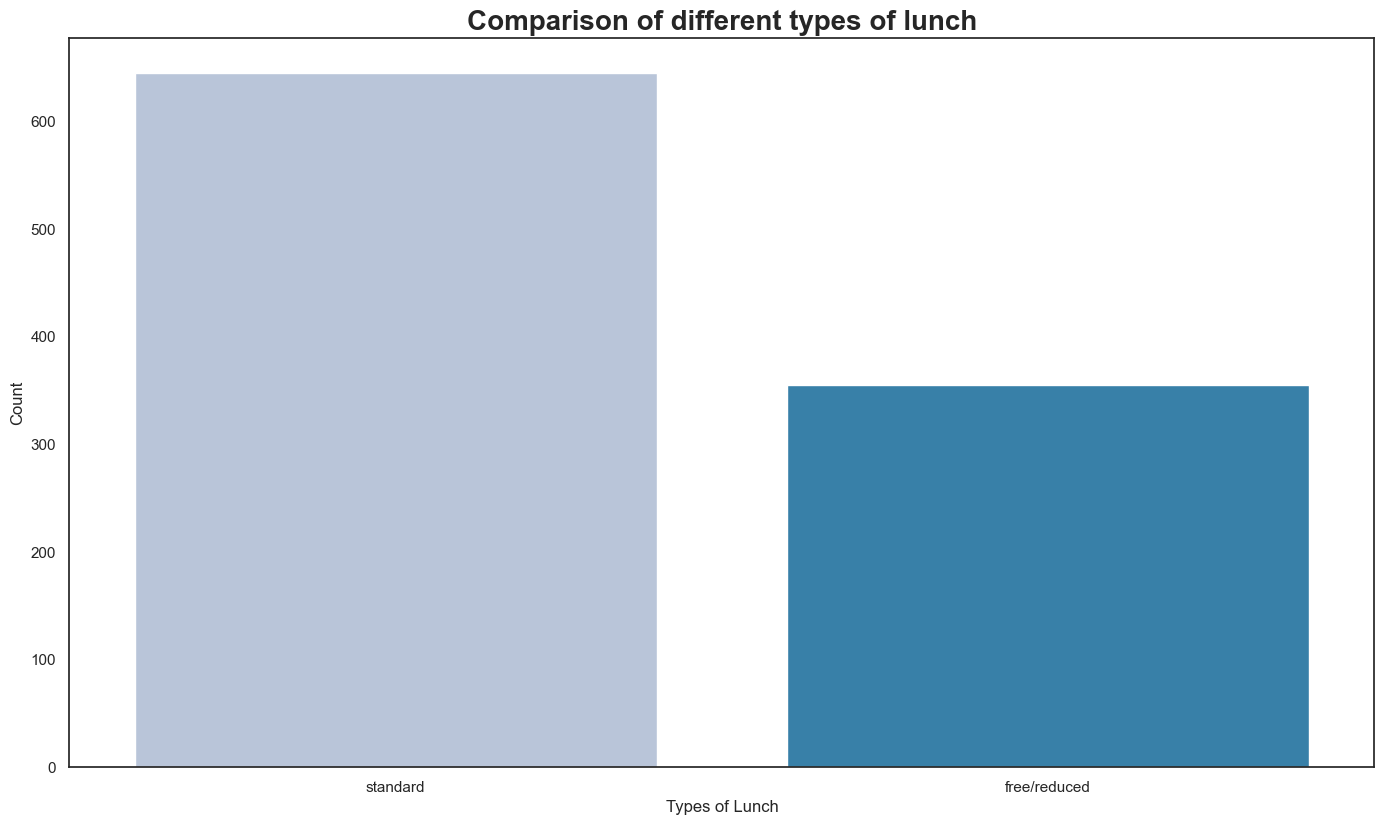

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
plt.figure(figsize=(15, 9))
sns.countplot(data=df, x='lunch', palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()


### Insights
- Students being served Standard lunch was more than free lunch.
- Group A students have scored the lowest marks.
- Students from a lower socioeconomic status have a lower average in all course subjects.
#### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

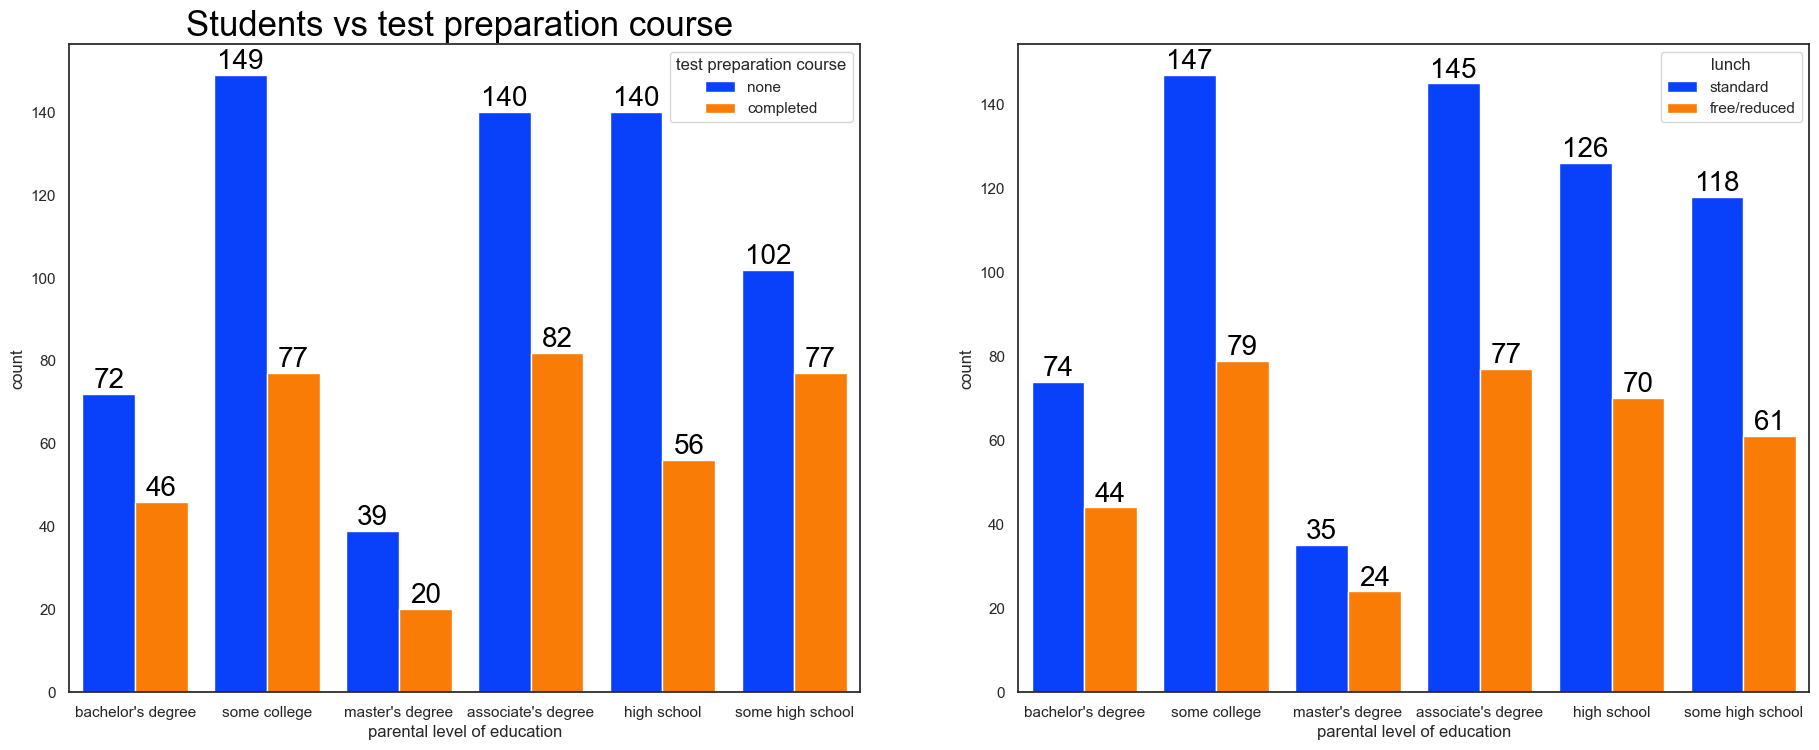

In [70]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

### Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch.
- The most common type of lunch among students is Standard Lunch.
- The Test Preparation Course has a positive impact on students' performance.
#### BIVARIATE ANALYSIS ( Is Test preparation course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing score'>

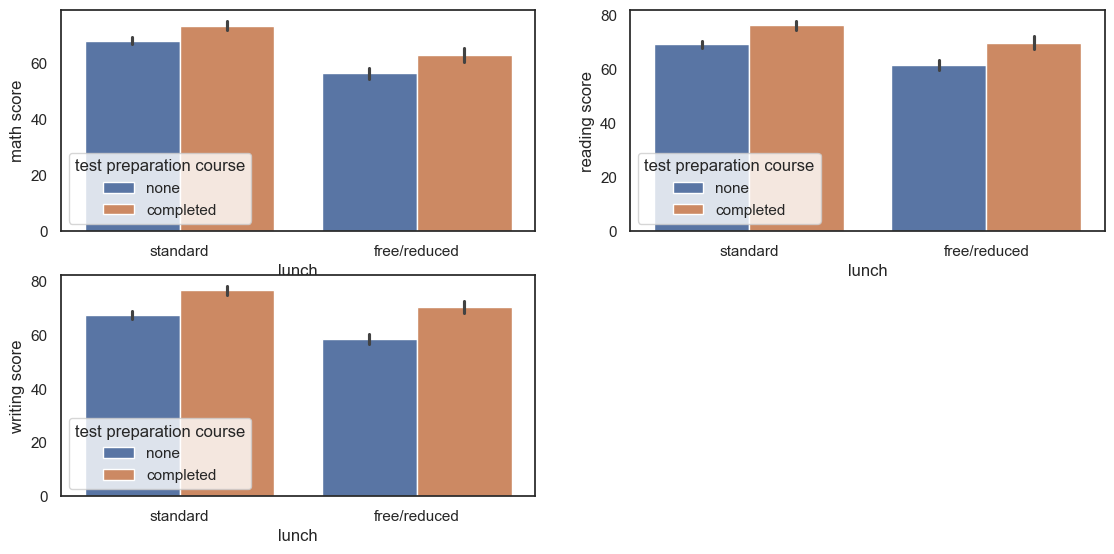

In [71]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

### Insights
Students who have completed the Test Preparation Course have scores higher in all three categories than those who haven't taken the course.
#### 4.4.6 CHECKING OUTLIERS


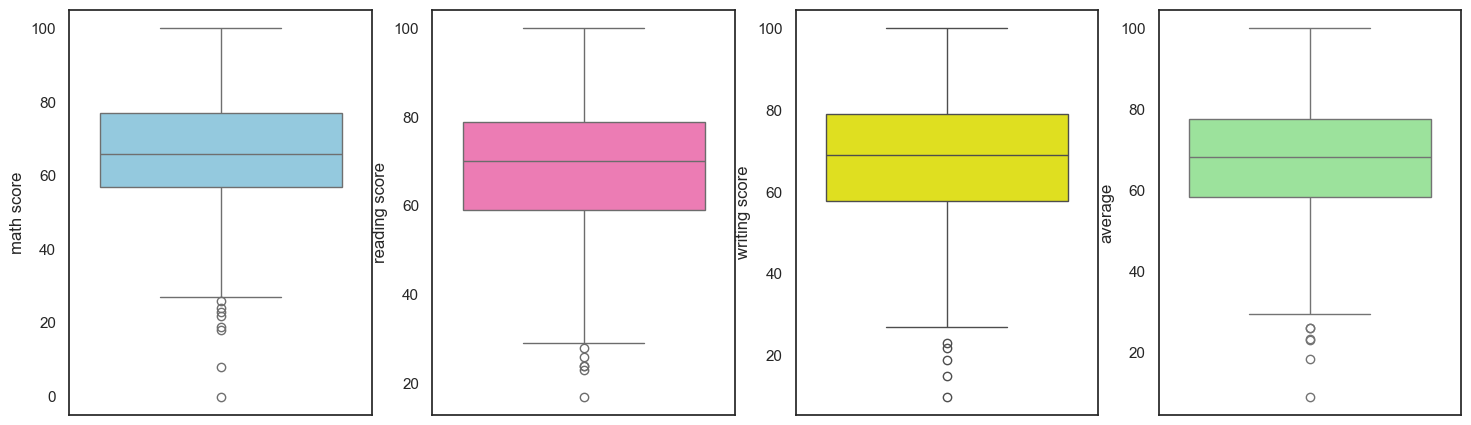

In [72]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### 4.4.7 MULTIVARIATE ANALYSIS USING PAIRPLOT

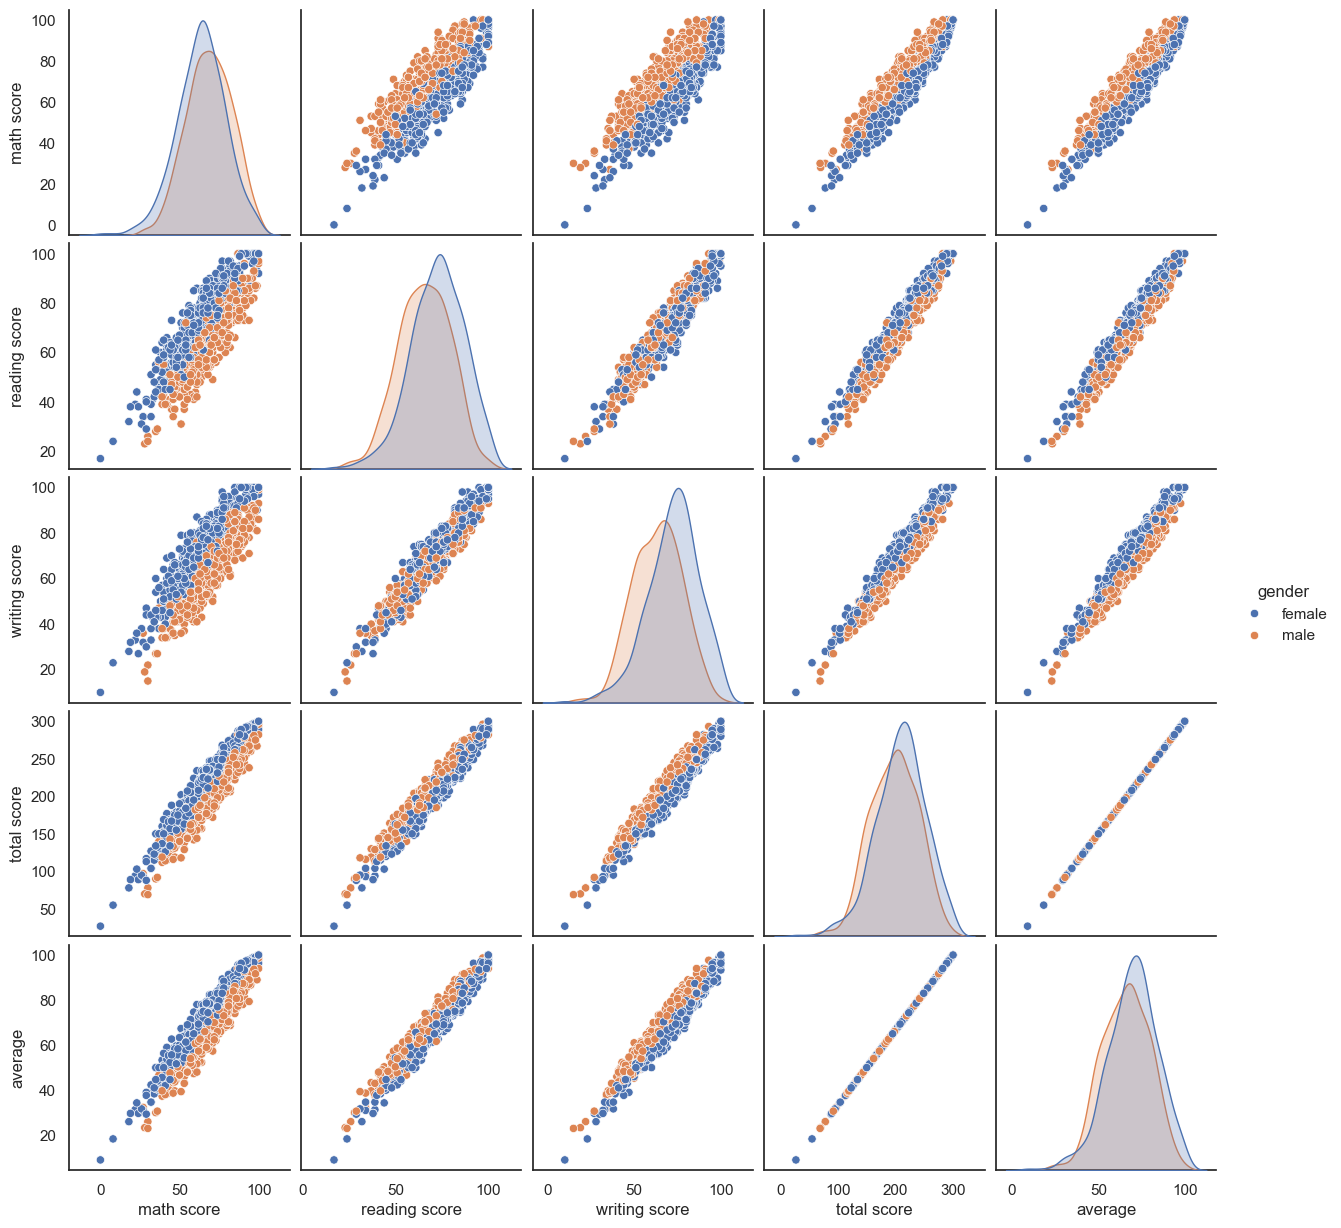

In [73]:
sns.pairplot(df,hue = 'gender')
plt.show()

## Insights

From the above plot, it is clear that all the scores increase linearly with each other.

---

## 5. Conclusions

- Student performance is related to lunch type, race/ethnicity, and parental level of education.
- Females lead in pass percentage and are also top scorers.
- Student performance is not strongly related to test preparation course, but finishing the preparation course is beneficial.